In [54]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import torch

In [5]:
data = pd.read_csv('forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [10]:
# one-hot encoding target variable 
data.area = np.where((data.area < 1), 0, data.area)
data.area = np.where((data.area > 1), 1, data.area)

# checking if target variable is balanced
data.area.value_counts()

In [11]:
data.area.value_counts()

0.0    274
1.0    243
Name: area, dtype: int64

In [38]:
scaler = StandardScaler()
ml_features = scaler.fit_transform(pd.get_dummies(data.drop(data.columns[[12]], axis=1)))
ml_target = data.area

In [59]:
X_train = ml_features[:350]
y_train = ml_target[:350]
X_test = ml_features[350:]
y_test = ml_target[350:]

In [47]:
network = torch.nn.Sequential(torch.nn.Linear(29, 300),
                              torch.nn.ReLU(),
                              torch.nn.Linear(300, 2))

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=0.1, momentum=0.9)

epochs = 10000

for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(X_train).float())
    targets = torch.autograd.Variable(torch.Tensor(y_train).long())
    optimizer.zero_grad()
    out = network(inputs)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    if epoch == 0 or (epoch +1) % 500 == 0:
        print('Epoch %d Loss: %.4g' % (epoch + 1, loss.item()))

Epoch 1 Loss: 0.6907
Epoch 500 Loss: 0.02838
Epoch 1000 Loss: 0.01264
Epoch 1500 Loss: 0.008811
Epoch 2000 Loss: 0.007141
Epoch 2500 Loss: 0.006303
Epoch 3000 Loss: 0.005786
Epoch 3500 Loss: 0.005438
Epoch 4000 Loss: 0.005195
Epoch 4500 Loss: 0.005017
Epoch 5000 Loss: 0.00488
Epoch 5500 Loss: 0.004772
Epoch 6000 Loss: 0.004685
Epoch 6500 Loss: 0.004613
Epoch 7000 Loss: 0.004553
Epoch 7500 Loss: 0.004502
Epoch 8000 Loss: 0.004459
Epoch 8500 Loss: 0.004422
Epoch 9000 Loss: 0.004389
Epoch 9500 Loss: 0.004361
Epoch 10000 Loss: 0.004335


In [62]:
inputs = torch.autograd.Variable(torch.Tensor(X_test).float())
targets = torch.autograd.Variable(torch.Tensor(y_test).long())

optimizer.zero_grad()
out = network(inputs)
_, predicted = torch.max(out.data, 1)

ValueError: could not determine the shape of object type 'Series'

In [49]:
predicted

tensor([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

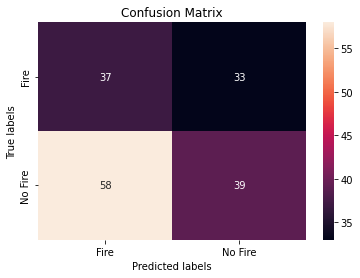

In [61]:
cm = confusion_matrix(y_test, predicted)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fire', 'No Fire']); ax.yaxis.set_ticklabels(['Fire', 'No Fire']);